# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [2]:
data = pd.read_csv("D:\\movies\\projects\\Prodigy Projects\\Health Insurance\\Health Insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Data Cleaning

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Descriptive Statistical Analysis

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
numerical_cols = data.select_dtypes(exclude='object').columns
print(numerical_cols)

categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


Plotting Boxplot and Checking for Outliers

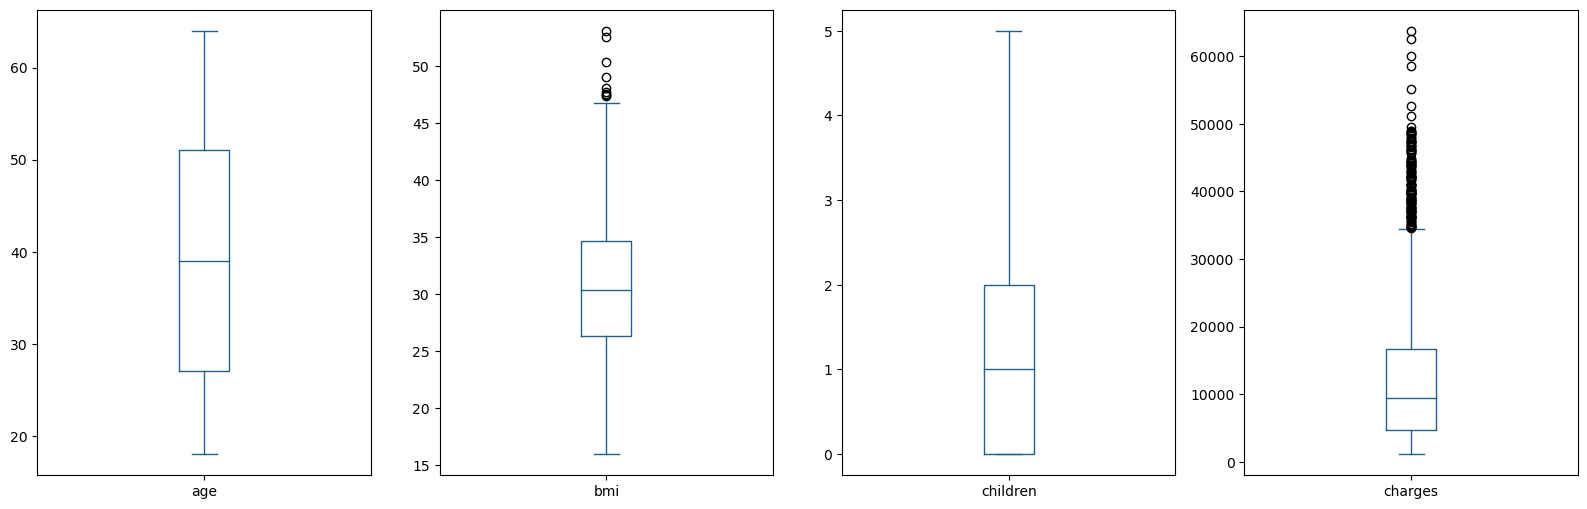

In [8]:
# Assuming 'data' is the DataFrame

# Selecting only numerical columns
numerical_cols = data.select_dtypes(include=['number'])

# Creating box plots for each column
numerical_cols.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#1F618D')
plt.tight_layout()
plt.show()

In [9]:
# Defining the remove_outliers function
def remove_outliers(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

# Applying the function to all numerical columns
data[numerical_cols.columns] = data[numerical_cols.columns].apply(remove_outliers)

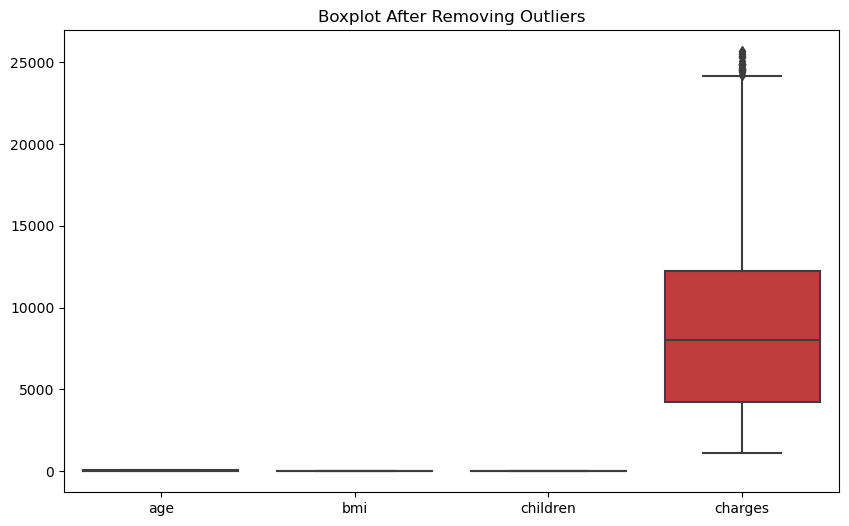

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'numeric_cols' contains the numerical columns
# Remove outliers from numerical columns
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

# Apply the function to all numerical columns
data_cleaned = data[numerical_cols.columns].apply(remove_outliers)

# Plotting boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned)
plt.title("Boxplot After Removing Outliers")
plt.show()


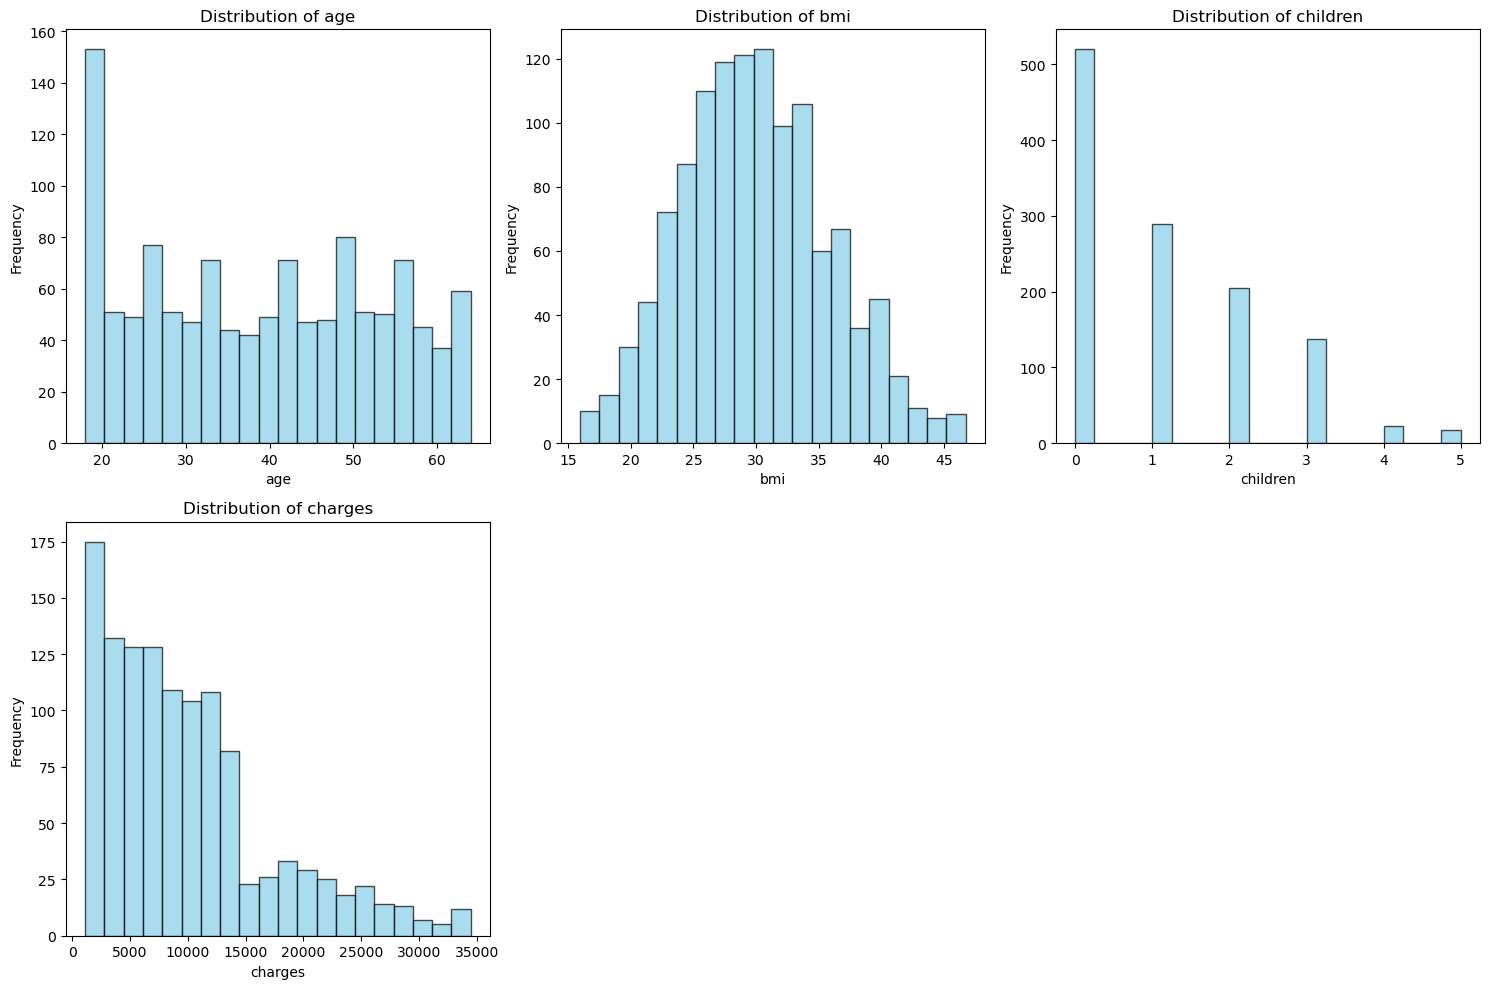

In [11]:
# Remove rows with missing values in numerical columns
data_cleaned = data[numerical_cols.columns].dropna()

# Plotting histograms after removing missing values
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols.columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_cleaned[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical Variables

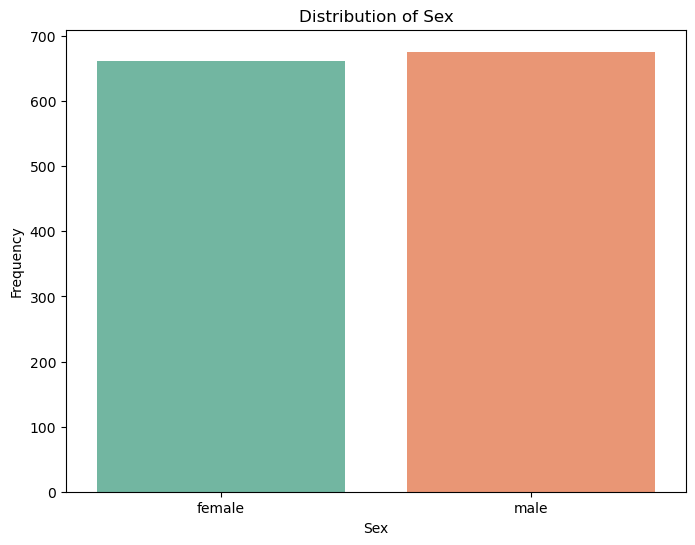

In [12]:
import seaborn as sns
# Creating a bar chart for 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Histogram (Continuous Variables):

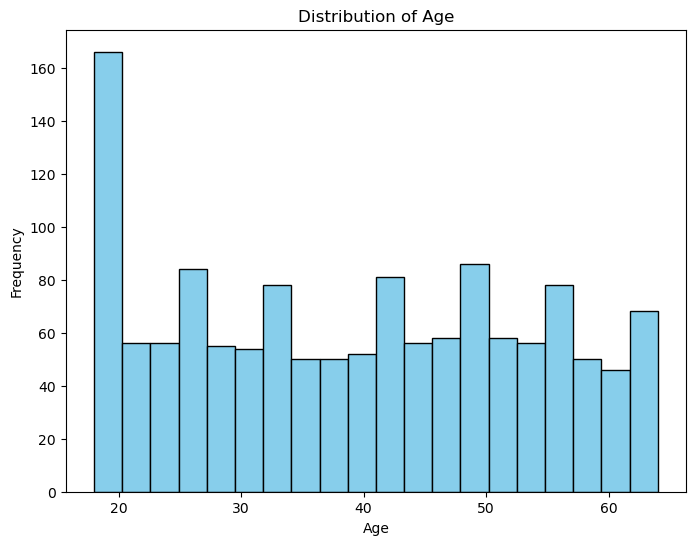

In [13]:
# Creating a histogram for 'age'
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()